### 📚 머신러닝 2장
#### 🖥️ 데이터 다루기

🔷 지도 학습과 비지도 학습

🔹 지도 학습 (Supervised Learning)
- 훈련을 위한 데이터(training data)와 정답이 필요
- 훈련 데이터 = 입력(input) + 정답(target)
- 분류, 회귀

🔹 비지도 학습 (Unsupervised Learning)
- 정답(taget)이 없고, `입력 데이터만 사용`
- 비슷한 특징끼리 `군집화`

🔹 강화 학습 (Reinforcement Learning)
- 현재 상태에서 어떤 행동을 취하는 것이 최선인지를 학습
- `{입력값 - 출력값}의 쌍이 정해지지 않음`
- 보상(reward)을 최대화하는 방법

훈련 세트와 테스트 세트 만들기 #1

In [5]:
# 데이터 생성
# 길이와 무게를 합친 2차원 리스트 생성 : fish_data
# 결과 확인을 위한 리스트 생성 : fish_target
fish_length =  [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 
475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 
575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 
920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 
8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

훈련 세트와 테스트 세트 만들기 #2
- fish_data, fish_target 리스트를 훈련 세트와 테스트 세트로 분리
- 훈련 세트 : 35개, 테스트 세트 : 14개

In [7]:
# 훈련 세트 생성 (35개)
train_input = fish_data[:35]
train_target = fish_target[:35]

In [8]:
# 테스트 세트 생성 (14개)
test_input = fish_data[35:]
test_target = fish_target[35:]

테스트 세트로 평가하기

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.0

📌 잘못된 훈련 데이터 (샘플링 편향)
- 훈련 세트(도미) - 테스트 세트(빙어)

Numpy를 활용한 배열 생성

In [10]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


Numpy를 이용하여 데이터 섞기

In [11]:
np.random.seed(42)
# 0 ~ 48까지 값을 가지는 배열 생성
index_list = np.arange(49)
print(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [12]:
np.random.shuffle(index_list)
print(index_list)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


랜덤 배열로 훈련 세트와 테스트 세트 만들기

In [13]:
# 훈련 세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]

In [14]:
# 테스트 세트 생성
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

무작위로 섞인 데이터 확인하기

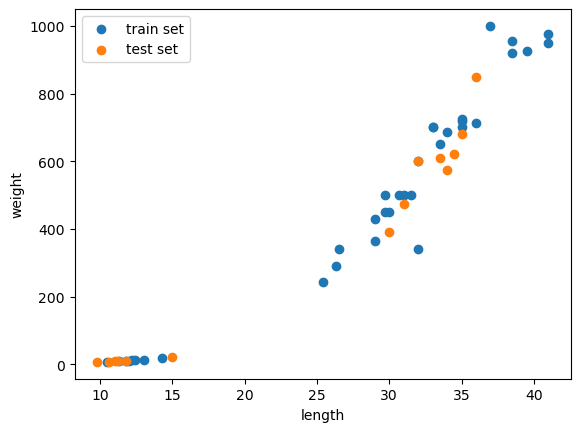

In [15]:
# 훈련 데이터와 테스트 데이터 다시 확인
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1], label = 'train set')
plt.scatter(test_input[:, 0], test_input[:, 1], label = 'test set')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

무작위로 섞인 훈련 세트와 테스트 세트를 이용하여 K-최근접 이웃 모델 생성 및 훈련

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier()

In [18]:
kn = knnModel.fit(train_input, train_target)

print("score: ", kn.score(test_input, test_target))
print('predict:      ', kn.predict(test_input))
print('test_target: ', test_target)

score:  1.0
predict:       [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
test_target:  [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

💣 문제점 발생
- 길이 25cm, 무게 150g안 도미를 빙어로 판단

In [19]:
print('predict(길이 25cm, 무게 150g): ', kn.predict([[25, 150]]))

predict(길이 25cm, 무게 150g):  [0]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


📌 샘플 데이터의 두 특성(길이, 무게)의 스케일이 다르기 때문
- `스케일을 조정해야 함` : 표준점수(평균과의 거리)로

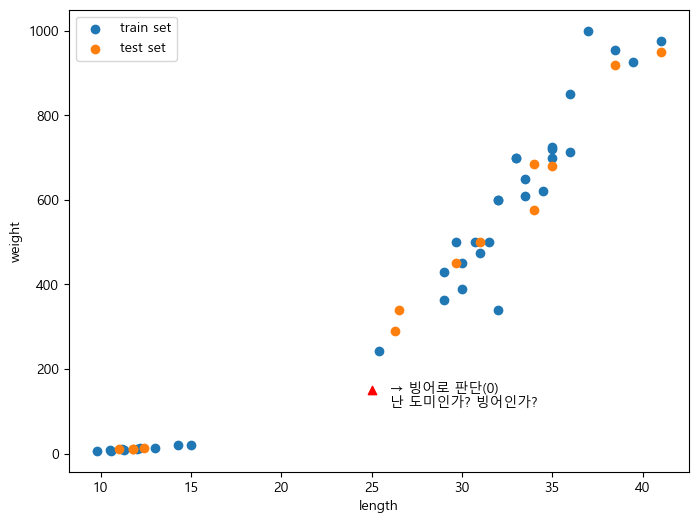

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(train_input[:, 0], train_input[:, 1], label = 'train set')
plt.scatter(test_input[:, 0], test_input[:, 1], label = 'test set')
plt.scatter(25, 150, marker='^', c='red')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.annotate('→ 빙어로 판단(0)\n난 도미인가? 빙어인가?', (26, 110))
plt.show()

Numpy를 활용한 데이터 전처리 #1
* column_stack() : 리스트를 일렬로 세운 다음 차례대로 연결, zip()함수와 동일

In [45]:
# column_stack((list1, list2)) : 튜플 형태로 전달
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


* ones(n), zeros(n) : 개수(n)만큼 각각 1과 0으로 채운 배열을 생성

In [46]:
print(np.ones(35))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [47]:
print(np.zeros(14))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Numpy를 활용한 데이터 전처리 #2
* concatenate((a1, a2, ...)) : a1, a2 배열을 서로 연결 (튜플로 전달)

In [48]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


사이킷런으로 훈련 세트와 테스트 세트 나누기 #1

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [53]:
train_input.shape, test_input.shape

((36, 2), (13, 2))

In [54]:
train_target.shape, test_target.shape

((36,), (13,))

가장 가까운 이웃 찾기 #1
- k-최근접 이웃 모델 적용

In [55]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [56]:
print("score: ", kn.score(test_input, test_target))

score:  1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [57]:
# 25cm, 150g의 생선 분류 (수상한 도미)
print(kn.predict([[25, 150]]))

[0.]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


📌 빙어로 분류

가장 가까운 이웃 찾기 #2

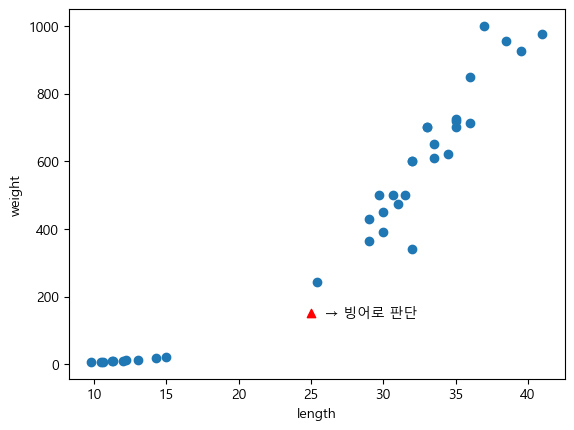

In [65]:
# 길이 25cm, 무게 150g의 생선을 산점도로 표시
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^', c='red')

plt.xlabel('length')
plt.ylabel('weight')
plt.annotate('→ 빙어로 판단', (26, 140))
plt.show()

In [75]:
# 가장 가까운 이웃과의 거리 계산
# n_neighbors(default값 5)개의 이웃을 찾음
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


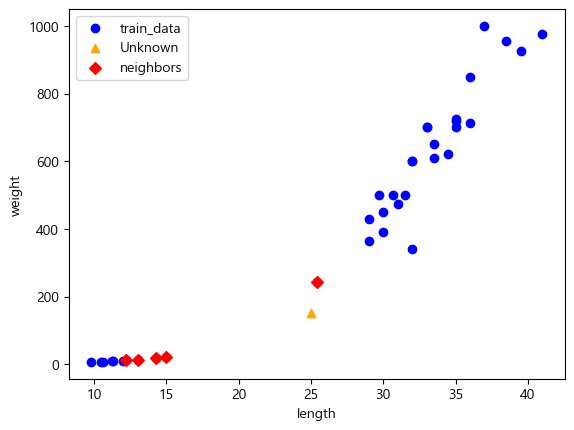

In [76]:
# 가장 가까운 이웃 5개를 산점도로 표시
plt.scatter(train_input[:, 0], train_input[:, 1], label = 'train_data', c='b')
plt.scatter(25, 150, marker='^', c='orange', label='Unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D',
            label='neighbors', color='r')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()